# CS-584 PROJECT (CRIME PREDICTION)
# Team Members 
1. Devika Beniwal - A20387387
2. Mahima Agarwal - A20383052
3. Sudipta Swarnakar - A20377210

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cross_validation import KFold
import pylab as pl
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [36]:
data = pd.read_csv("communities-crime-clean.csv")


In [37]:
data.loc[data['ViolentCrimesPerPop'] > 0.1 ,'HighCrime'] = True
data.loc[data['ViolentCrimesPerPop'] <= 0.1 ,'HighCrime'] = False

In [38]:
total = len(data)
positiveInstances = len(data[data.HighCrime==True])
negativeInstances = len(data[data.HighCrime==False])
percentagePos = (float(positiveInstances)/total *100)
percentageNeg = (float(negativeInstances)/total *100)
print("Positive Instances %.2f " %positiveInstances)
print("Negative Instances : %.2f" %negativeInstances)
print("Percentage of Positive Instances : %.2f" %percentagePos) 
print("Percentage of Negative Instances : %.2f" %percentageNeg)

Positive Instances 1250.00: 
Negative Instances : 743.00
Percentage of Positive Instances : 62.72
Percentage of Negative Instances : 37.28


In [39]:
Y_train = np.asarray(data['HighCrime'], dtype="|S6")
dfT = data[data.HighCrime == True]
dfF = data[data.HighCrime == False]


In [40]:
data.drop(['ViolentCrimesPerPop','HighCrime'],inplace = True,axis=1)
dfT.drop(['HighCrime'],inplace = True,axis=1)
dfF.drop(['HighCrime'],inplace = True,axis=1)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
def replaceCommunityName(data):
    dictName = {}
    communityName = data['communityname']
    cnt =1
    for i in communityName:
        if i in dictName.keys():
            dictName[i] = dictName[i]+1
        else:
            dictName[i] = cnt
        cnt = cnt +1
    for index, row in data.iterrows():
        val = row['communityname']
        data.set_value(index, 'communityname', dictName[val])
    return data

In [43]:
data=replaceCommunityName(data)
X_train = data
features = data
lb = LabelBinarizer()
y_train = np.array([number[0] for number in lb.fit_transform(Y_train)])

# 1. DecisionTree

# Decision Tree Classifier

In [11]:
clf = DecisionTreeClassifier()
x_train,x_test,yy_train,y_test=train_test_split(X_train,y_train,test_size=0.3, random_state=42)
clf.fit(x_train, yy_train)
y_pred = clf.predict(x_test)

In [12]:
confusion_matrix(y_test, y_pred)

array([[147,  65],
       [ 82, 304]])

In [13]:
accuracy_score(y_test, y_pred)

0.75418060200668902

In [14]:
precision_score(y_test, y_pred, average='macro')

0.73288481793114879

In [15]:
recall_score(y_test, y_pred, average='macro')  

0.74048049662723625

In [16]:
model = SelectFromModel(clf,prefit=True) 
X_new = model.transform(x_train) 
top_features = model.get_support()
names = features.columns.values
top_feature=[]
for i in range(0,103):
    if top_features[i]==True:
        top_feature.append(names[i])
top_feature 

['state',
 'communityname',
 'racePctWhite',
 'racePctHisp',
 'agePct65up',
 'pctWPubAsst',
 'blackPerCap',
 'OtherPerCap',
 'HispPerCap',
 'PctNotHSGrad',
 'PctUnemployed',
 'MalePctDivorce',
 'MalePctNevMarr',
 'PctKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'NumImmig',
 'PctImmigRec10',
 'PctNotSpeakEnglWell',
 'PctLargHouseOccup',
 'PersPerOwnOccHous',
 'HousVacant',
 'PctSameHouse85']

In [17]:
'''From the above features we can observe that top features like racePctWhite,racePctHisp,HispPerCap,NumImmig,
PctNotSpeakEnglWell,PctUnemployedare are playing a crucial role to predict crime in a particular area.They make sense 
because features like race , notspeakingenglishwell, unemployment are highly correlated to crime'''


'From the above features we can observe that top features like racePctWhite,racePctHisp,HispPerCap,NumImmig,\nPctNotSpeakEnglWell,PctUnemployedare are playing a crucial role to predict crime in a particular area.'

In [18]:
clf.fit(X_train,y_train)
scores = cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
scores

array([ 0.66      ,  0.785     ,  0.665     ,  0.76884422,  0.66834171,
        0.59798995,  0.72864322,  0.68341709,  0.78894472,  0.67839196])

In [19]:
print("10 Fold Accuracy = %0.3f" % scores.mean())

10 Fold Accuracy = 0.702


In [20]:
recall = cross_val_score(clf, X_train, y_train, cv=10, scoring='recall')
precision = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision')


In [21]:
recall

array([ 0.928,  0.856,  0.824,  0.888,  0.648,  0.56 ,  0.832,  0.648,
        0.896,  0.656])

In [22]:
precision

array([ 0.67836257,  0.79699248,  0.75      ,  0.77142857,  0.78504673,
        0.7244898 ,  0.76119403,  0.88235294,  0.79310345,  0.7961165 ])

In [23]:
print("10 Fold Precision = %0.3f" % precision.mean())
print("10 Fold Recall = %0.3f" % recall.mean())

10 Fold Precision = 0.774
10 Fold Recall = 0.774


In [24]:
'''We can observe that we are getting more accuracy with train_test_split whereas this accuracy is getting decreased 
largely when we are using 10folds cross validation as because cross validation provides more accurate estimate of
out-of-sample accuracy.
Cross validation also provides a way to use our data in more efficient way as every observation is used for both 
training and testing whereas there is high chances of overfitting for train_test_split.'''

'We can observe that we are getting more accuracy with train_test_split whereas this accuracy is getting decreased \nlargely when we are using 10folds cross validation as because cross validation provides more accurate estimate of\nout-of-sample accuracy.\nCross validation also provides a way to use our data in more efficient way as every observation is used for both \ntraining and testing whereas there is high chances of overfitting for train_test_split.'

# 2. Linear Classification

# GaussianNB

In [25]:
gb = GaussianNB()
gb.fit(X_train,y_train)
scoresNB = cross_val_score(gb,X_train,y_train,cv=10,scoring='accuracy')
scoresNB

array([ 0.79      ,  0.805     ,  0.805     ,  0.79899497,  0.69346734,
        0.66331658,  0.8241206 ,  0.71859296,  0.70351759,  0.8040201 ])

In [26]:
recall = cross_val_score(gb, X_train, y_train, cv=10, scoring='recall')
recall

array([ 0.784,  0.728,  0.736,  0.736,  0.544,  0.544,  0.784,  0.552,
        0.736,  0.736])

In [27]:
precision = cross_val_score(gb, X_train, y_train, cv=10, scoring='precision')
precision

array([ 0.86725664,  0.94791667,  0.93877551,  0.92929293,  0.94444444,
        0.87179487,  0.9245283 ,  1.        ,  0.77966102,  0.93877551])

In [28]:
print("10 Fold Accuracy = %0.3f" % scoresNB.mean())
print("10 Fold Recall = %0.3f" % recall.mean())
print("10 Fold Precision = %0.3f" % precision.mean())


10 Fold Accuracy = 0.761
10 Fold Recall = 0.688
10 Fold Precision = 0.914


In [45]:
dfF=replaceCommunityName(dfF)
dfF = dfF.as_matrix()

In [46]:
dfT=replaceCommunityName(dfT)
dfT = dfT.as_matrix()

In [48]:
dic={}
for i in range(0,103):
    m1 = dfT[:,i].mean()
    m2 = dfF[:,i].mean()
    u1 = np.var(dfT[:,i])
    u2 = np.var(dfF[:,i])
    diff = (m1-m2)/(u1-u2)
    dic[data.columns[i]] = diff 
    
most_predictive_features = sorted(dic.iteritems(), key=lambda (k, v): (-v, k))[:10]
most_predictive_features

[('agePct65up', 406.6242575519556),
 ('PctVacMore6Mos', 218.9443137420503),
 ('pctWInvInc', 147.30572748012378),
 ('MedOwnCostPctIncNoMtg', 107.58470962707582),
 ('MalePctDivorce', 102.63377492043965),
 ('PctOccupManu', 73.44444495571547),
 ('PctPersOwnOccup', 72.18317645015662),
 ('MalePctNevMarr', 44.18280742828296),
 ('MedYrHousBuilt', 43.39527963498466),
 ('PctHousOwnOcc', 27.47125533480012)]

In [96]:
'''In order to predict top features we are calculating mean for each features of true intances(m1) and mean for 
each features of false instances(m2) and also calculating standard deviation respectively for each of them.
Here difference of m1 and m2 tells us how different features are in comparison with each others whereas summation
of standard deviation is used to have a distribution of unit variance.
So finally formula (m1-m2)/(u1+u2) tells us about how independent the features are in comparison with each others.
'''

'In order to predict top features we are calculating mean for each features of true intances(m1) and mean for \neach features of false instances(m2) and also calculating standard deviation respectively for each of them.\nHere difference of m1 and m2 tells us how different features are in comparison with each others whereas summation\nof standard deviation is used to have a distribution of unit variance.\nSo finally formula (m1-m2)/(u1+u2) tells us about how independent the features are in comparison with each others.\n'

In [ ]:
'''We can observe that Naive Bayes is giving better accuracy in comparison with DecisionTreeClassifier'''

# Linear SVC

In [47]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train,Y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
scoresSVC=cross_val_score(svc,X_train,y_train,cv=10,scoring='accuracy')

In [49]:
scoresSVC

array([ 0.765     ,  0.825     ,  0.87      ,  0.84924623,  0.71859296,
        0.73869347,  0.8241206 ,  0.8040201 ,  0.82914573,  0.81407035])

In [50]:
scoresSVC.mean()

0.80378894472361817

In [51]:
precision = cross_val_score(svc, X_train, y_train, cv=10, scoring='precision')
print('Precision', np.mean(precision), precision)

('Precision', 0.85505999926424248, array([ 0.72674419,  0.79605263,  0.85611511,  0.88      ,  0.89655172,
        0.85436893,  0.8515625 ,  0.97777778,  0.83211679,  0.87931034]))


In [52]:
recall = cross_val_score(svc, X_train, y_train, cv=10, scoring='recall')
print('Recall', np.mean(recall), recall)

('Recall', 0.84320000000000006, array([ 1.   ,  0.968,  0.952,  0.88 ,  0.624,  0.704,  0.872,  0.704,
        0.912,  0.816]))


In [53]:
coef = svc.coef_
#svm_weights = (svc.coef_ ** 2).sum(axis=0)

In [54]:
coef_dict = {}
for coef, feat in zip(coef,X_train):
    coef_dict[feat] = coef

In [55]:
top_positive_coefficients = np.argsort(coef)[-10:]
top_negative_coefficients = np.argsort(coef)[:10]

In [56]:
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

In [57]:
import matplotlib.pyplot as plt

In [58]:
plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]

In [59]:
 plt.bar(np.arange(2*10), coef[top_coefficients], color=colors)

<Container object of 20 artists>

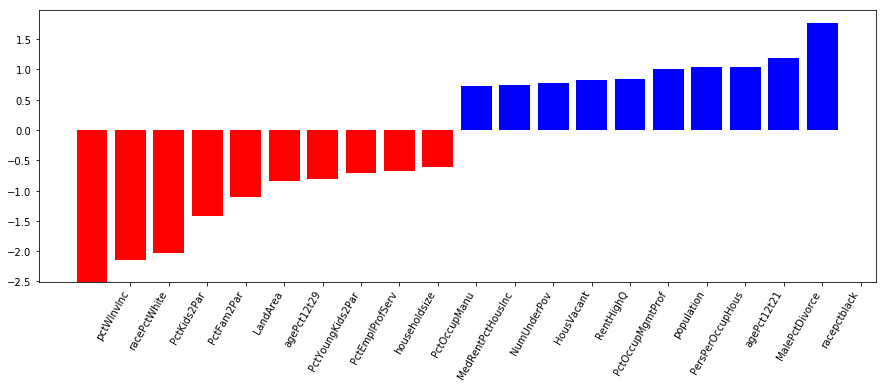

In [60]:
plt.xticks(np.arange(1, 1 + 2 * 10), X_train[top_coefficients], rotation=60, ha='right')
plt.show()

In [ ]:
'''Once a linear SVM is fit to data (e.g., svm.fit(features, labels)), the coefficients can be accessed with 
svm.coef_.Recall that a linear SVM creates a hyperplane that uses support vectors to maximise the distance between 
the two classes. The weights obtained from svm.coef_ represent the vector coordinates which are orthogonal to the 
hyperplane and their direction indicates the predicted class.
The absolute size of the coefficients(feature weights) in relation to each other can then be used to determine 
feature importance for the data separation task.'''

In [ ]:
'''We can observe that Linear SVM is giving much much better accuracy in comparison with DecisionTreeClassifier'''

# 3. Regression

# LinearRegression

In [32]:
df = pd.read_csv("communities-crime-clean.csv")

In [33]:
y_linear_train = df['ViolentCrimesPerPop']
yy = df['ViolentCrimesPerPop']
X_High = df[df['ViolentCrimesPerPop'] > 0.1]
X_Low = df[df['ViolentCrimesPerPop'] <= 0.1]
Y_High = X_High['ViolentCrimesPerPop']
Y_Low = X_Low['ViolentCrimesPerPop']

In [34]:
df.drop(['ViolentCrimesPerPop'],axis=1, inplace=True)
X_High.drop(['ViolentCrimesPerPop'],axis=1, inplace=True)
X_Low.drop(['ViolentCrimesPerPop'],axis=1, inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
df=replaceCommunityName(df)
x_linear_train = df
features = df

In [52]:
x_linear_train = np.array(x_linear_train, dtype = 'float_')
y_linear_train = np.array(y_linear_train, dtype = 'float_')

In [53]:
regr = linear_model.LinearRegression()
regr.fit(x_linear_train,y_linear_train)
mse = cross_validation.cross_val_score(regr,x_linear_train, y_linear_train, scoring='neg_mean_squared_error', cv=10,)
mse_10cv = mse.mean()*(-1)

In [54]:
p = regr.predict(x_linear_train)
err = abs(p-y_linear_train)

In [55]:
total_error = np.dot(err,err)
mse_train =(total_error/len(p))
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('MSE on training: %.4f' %mse_train)
print('MSE on 10-fold CV: %.4f' %mse_10cv)

Method: Simple Linear Regression
MSE on training: 0.0164
MSE on 10-fold CV: 0.0199


In [56]:
model = SelectFromModel(regr,prefit=True) 
X_new = model.transform(x_linear_train) 
top_features=model.get_support()
names = features.columns.values
top_feature=[]
for i in range(0,103):
    if top_features[i]==True:
        top_feature.append(names[i])

In [57]:
X_High=replaceCommunityName(X_High)
X_Low=replaceCommunityName(X_Low)


In [58]:
regr.fit(X_High,Y_High)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
model = SelectFromModel(regr,prefit=True) 
X_new = model.transform(X_High) 
top_features_high=model.get_support()

In [60]:
top_feature_for_HighCrime=[]
for i in range(0,103):
    if top_features_high[i]==True:
        top_feature_for_HighCrime.append(names[i])
top_feature_for_HighCrime

['population',
 'racepctblack',
 'agePct12t29',
 'agePct16t24',
 'numbUrban',
 'medIncome',
 'pctWWage',
 'pctWInvInc',
 'medFamInc',
 'whitePerCap',
 'PctPopUnderPov',
 'PctEmploy',
 'MalePctDivorce',
 'MalePctNevMarr',
 'TotalPctDiv',
 'PctKids2Par',
 'PctWorkMom',
 'PctRecImmig5',
 'PctRecImmig8',
 'PersPerOccupHous',
 'PersPerRentOccHous',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'PctHousOwnOcc',
 'OwnOccLowQuart',
 'OwnOccMedVal',
 'RentLowQ',
 'RentHighQ',
 'MedRent']

In [61]:
regr.fit(X_Low,Y_Low)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
model = SelectFromModel(regr,prefit=True) 
X_new = model.transform(X_Low) 
top_features_low=model.get_support()

In [63]:
top_feature_for_LowCrime=[]
for i in range(0,103):
    if top_features_low[i]==True:
        top_feature_for_LowCrime.append(names[i])
top_feature_for_LowCrime

['population',
 'racepctblack',
 'racePctWhite',
 'racePctHisp',
 'agePct65up',
 'numbUrban',
 'medIncome',
 'pctWInvInc',
 'medFamInc',
 'NumUnderPov',
 'MalePctDivorce',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'NumIlleg',
 'PctLargHouseFam',
 'PctLargHouseOccup',
 'PersPerOccupHous',
 'PersPerOwnOccHous',
 'PctPersOwnOccup',
 'HousVacant',
 'PctHousOwnOcc',
 'NumInShelters']

# RidgeRegression

In [64]:
# Grid Search for Algorithm Tuning
alphas = np.array([10,1,0.1,0.01,0.001])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(x_linear_train,y_linear_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+01,   1.00000e+00,   1.00000e-01,   1.00000e-02,
         1.00000e-03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [71]:
# Value of Best Alpha
print("Best Alpha : %.0f" %grid.best_estimator_.alpha)

Best Alpha : 10


In [72]:
ridge = Ridge(alpha=10.0)
mse1 = cross_validation.cross_val_score(ridge,x_linear_train, y_linear_train, scoring='neg_mean_squared_error', cv=10,)
mse_10cv = mse1.mean()*(-1)

In [73]:
ridge.fit(x_linear_train,y_linear_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
pred = ridge.predict(x_linear_train)

In [75]:
err = abs(pred - y_linear_train)

In [76]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# Compute MSE
mse_train =(total_error/len(pred))

In [77]:
method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('MSE on training: %.4f' %mse_train)
print('MSE on 10-fold CV: %.4f' %mse_10cv)

Method: Ridge Regression
MSE on training: 0.0174
MSE on 10-fold CV: 0.0197


In [78]:
'''we can see that Ridge Regression gives an estimate which minimize MSE in comparison to Linear Regression.
As for overfitting,we can observe that Ridge has reduced overfitting due to its addition of penalty term.
We can also see that Ridge has chosen the feature's estimates to penalize in such a way that less influential 
features (Some features cause very small influence on dependent variable) undergo more penalization.
'''

"we can see that Ridge Regression gives an estimate which minimize MSE in comparison to Linear Regression.\nAs for overfitting,we can observe that Ridge has reduced overfitting due to its addition of penalty term.\nWe can also see that Ridge has chosen the feature's estimates to penalize in such a way that less influential \nfeatures (Some features cause very small influence on dependent variable) undergo more penalization.\n"

# Quaddratic Polynomial Regression

In [79]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
mse2 = cross_validation.cross_val_score(ridge,x_linear_train, y_linear_train, scoring='neg_mean_squared_error',cv=10,)
mean_squared_error=mse2.mean()*(-1)

In [80]:
model = model.fit(x_linear_train,y_linear_train)
pr=model.predict(x_linear_train)
er = abs(pr-y_linear_train)

In [81]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(er,er)
# Compute MSE
mse_train =(total_error/len(pr))

In [82]:
method_name = 'Quadratic Ploynomial Regression'
print('Method: %s' %method_name)
print('MSE on training: %.4f' %mse_train)
print('MSE on 10-fold CV: %.4f' %mean_squared_error)

Method: Quadratic Ploynomial Regression
MSE on training: 0.0000
MSE on 10-fold CV: 0.0197


In [ ]:
'''Yes , we can see from MSE calculation that quadratic model is performing better than linear model'''

# 4. Dirty Data

In [225]:
df_dirty = pd.read_csv("communities-crime-full.csv")

In [226]:
df_dirty.loc[df_dirty['ViolentCrimesPerPop'] > 0.1,'HighCrime'] = True
df_dirty.loc[df_dirty['ViolentCrimesPerPop'] <= 0.1,'HighCrime'] = False

In [227]:
Y_train = np.asarray(df_dirty['HighCrime'], dtype="|S6")

In [228]:
df_dirty.drop(['ViolentCrimesPerPop','HighCrime'],inplace = True,axis=1)

In [229]:
df_dirty=replaceCommunityName(df_dirty)

In [232]:
X_train = df_dirty
XX = X_train.replace('?', np.NaN)

In [234]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp=imp.fit(XX)
x =imp.transform(XX)

In [235]:
x_train,x_test,yy_train,y_test = train_test_split(x,Y_train,test_size=0.3, random_state=42)
clf.fit(x_train, yy_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [236]:
clf.score(x_test, y_test)

0.81636060100166941

In [241]:
clf.fit(x, Y_train)
scores = cross_val_score(clf,x,Y_train,cv=10,scoring='accuracy')
scores.mean()

0.83149166229155713

In [242]:
Y_train = np.array([number[0] for number in lb.fit_transform(Y_train)])


# With Cross Validation

In [243]:
precisionDirty = cross_val_score(clf, x, Y_train, cv=10, scoring='precision')
precisionDirty.mean()

0.86309169533919106

In [244]:
recallDirty = cross_val_score(clf, x, Y_train, cv=10, scoring='recall')
recallDirty.mean()

0.86810158730158737

In [245]:
'''We can see that the accuracy has been increased after using Imputation with mean approach which replaces 
 all missing values with mean along the axis.'''

'We can see that the accuracy has been increased after using Imputation with mean approach which replaces \n all missing values with mean along the axis.'

In [ ]:
'''Here in order to deal with missing values we could have easily removed those rows which contains missing values
but in that case we would have lost lots of good features.Rather it is better approach to replace it with mean along
the axis using Imputer
'''

# 5. Team Of Three

# Non LinearSVM(Polynomial Kernel)

# With Clean Dataset

In [216]:
X_train = data
pl = svm.OneClassSVM(kernel="poly", gamma=2)
pl.fit(X_train)
scores=cross_val_score(pl,X_train,y_train,cv=10,scoring='accuracy')
scores.mean()

0.24522613065326632

In [224]:
'''The accuracy is dying as because our data is linearly separable so applying non-linear kernel is not a 
great idea'''

'The accurayc is dying as because our data is linearly separable so applying non-linear kernel is not a \ngreat idea'

# With Dirty Dataset

In [246]:
X_train = data
pl = svm.OneClassSVM(kernel="poly", gamma=2)
pl.fit(x)
scores=cross_val_score(pl,x,Y_train,cv=10,scoring='accuracy')
scores.mean()

0.28978140703517591

# RandomForest Classifier

# With Clean Dataset

In [219]:
clf = RandomForestClassifier(max_depth=10,max_features=10,n_estimators=100,bootstrap=True, oob_score=False)
scoresRF = cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
scoresRF.mean()

0.79676381909547744

In [220]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [221]:
#now you can see the importance of each feature in Forest.feature_importances_
# these values will all add up to one.Let's call the "important" ones the ones that are above average.
important_features = []
for x,i in enumerate(clf.feature_importances_):
    if i>np.average(clf.feature_importances_):
        important_features.append(x)

In [222]:
names=features.columns.values
consistent_features=[]
for i in range(0,103):
    if i in important_features:
        consistent_features.append(names[i])
consistent_features

['communityname',
 'racepctblack',
 'racePctWhite',
 'racePctHisp',
 'pctWInvInc',
 'PctPopUnderPov',
 'PctUnemployed',
 'MalePctDivorce',
 'FemalePctDiv',
 'TotalPctDiv',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'NumIlleg',
 'PctIlleg',
 'PctNotSpeakEnglWell',
 'PctLargHouseFam',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'PctHousLess3BR',
 'PctHousNoPhone']

# With Dirty Dataset

In [247]:
clf = RandomForestClassifier(max_depth=10,max_features=10,n_estimators=100,bootstrap=True, oob_score=False)
scoresRF = cross_val_score(clf,x,Y_train,cv=10,scoring='accuracy')
scoresRF.mean()

0.84151686292157302

In [248]:
clf.fit(x,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [249]:
#now you can see the importance of each feature in Forest.feature_importances_
# these values will all add up to one.Let's call the "important" ones the ones that are above average.
important_features = []
for x,i in enumerate(clf.feature_importances_):
    if i>np.average(clf.feature_importances_):
        important_features.append(x)

In [250]:
names=features.columns.values
consistent_features=[]
for i in range(0,103):
    if i in important_features:
        consistent_features.append(names[i])
consistent_features

['state',
 'racePctAsian',
 'racePctHisp',
 'agePct12t29',
 'pctWPubAsst',
 'medFamInc',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctUnemployed',
 'PctEmplManu',
 'FemalePctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumImmig',
 'PctImmigRecent',
 'PctLargHouseOccup',
 'PersPerOccupHous',
 'MedNumBR',
 'PctHousOwnOcc',
 'PctVacMore6Mos',
 'OwnOccLowQuart']

In [251]:
'''From the above analysis it is quite clear that Random Forest is providing an accurayc almost like Linear SVM. 
SO we can conclude by saying that unlike non-linear SVM,Random Forest is doing really well when it comes to accuracy
'''

'From the above analysis it is quite clear that Random Forest is providing an accurayc almost like Linear SVM. \nSO we can conclude by saying that unlike non-linear SVM,Random Forest is doing really well when it comes to accuracy\n'

# Finding The Most Useful Threshold

In [184]:
imb_data = pd.read_csv("communities-crime-clean.csv")
imb_data.loc[imb_data['ViolentCrimesPerPop'] > 0.15,'HighCrime']=True
imb_data.loc[imb_data['ViolentCrimesPerPop'] <= 0.15,'HighCrime']=False

In [185]:
imb_dirty_data = pd.read_csv("communities-crime-full.csv")
imb_dirty_data.loc[imb_dirty_data['ViolentCrimesPerPop'] > 0.15,'HighCrime']=True
imb_dirty_data.loc[imb_dirty_data['ViolentCrimesPerPop'] <= 0.15,'HighCrime']=False

In [193]:
'''In order to find the most useful threshold,we have use error optimization technique and found that 50-50 split 
of class attributes gives the best threshold for crime rate.Through this optimization technique we have found that
the value of threshold should be 0.15 which gives almost 50-50 split of different class attrbutes.
'''

'In order to find the most useful threshold,we have use error optimization technique and found that 50-50 split \nof class attributes gives the best threshold for crime rate.Through this optimization technique we have found that\nthe value of threshold should be 0.15 which gives almost 50-50 split of different class attrbutes.\n'

In [186]:
imb_data['HighCrime'].value_counts()

False    1001
True      992
Name: HighCrime, dtype: int64

In [194]:
'''From the above it is quite clear that having a threshold of 0.15 gives the best split of class attributes
as True and False instances are almost in same count for this threshold.
'''

'From the above it is quite clear that having a threshold of 0.15 gives the best split of class attributes\nas True and False instances are almost in same count for this threshold.\n'

In [187]:
Y_train_imb = np.asarray(imb_data['HighCrime'], dtype="|S6")
Y_train_imb_dirty = np.asarray(imb_dirty_data['HighCrime'], dtype="|S6")

In [188]:
imb_data.drop(['ViolentCrimesPerPop','HighCrime'],inplace = True,axis=1)
imb_dirty_data.drop(['ViolentCrimesPerPop','HighCrime'],inplace = True,axis=1)

In [189]:
imb_data=replaceCommunityName(imb_data)
imb_dirty_data=replaceCommunityName(imb_dirty_data)

In [190]:
X_train_imb = imb_data
X_train_imb_dirty= imb_dirty_data

In [259]:
X_Dirty = X_train_imb_dirty.replace('?', np.NaN)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp=imp.fit(X_Dirty)
x =imp.transform(X_Dirty)

# DecisionTreeClassifier

# With Clean Dataset

In [253]:
clf = DecisionTreeClassifier()
clf.fit(X_train_imb,Y_train_imb)
scores = cross_val_score(clf,X_train_imb,Y_train_imb,cv=10,scoring='accuracy')
scores.mean()

0.71020335508387711

# With Dirty Dataset

In [260]:
clf = DecisionTreeClassifier()
clf.fit(x,Y_train_imb_dirty)
scores = cross_val_score(clf,x,Y_train_imb_dirty,cv=10,scoring='accuracy')
scores.mean()

0.75880769519237978

# LinearSVC

# With Clean Dataset

In [ ]:
svc_imb = svm.SVC(kernel='linear')
svc_imb.fit(X_train_imb,Y_train_imb)  
scoresSV = cross_val_score(svc_imb,X_train_imb,Y_train_imb,cv=10,scoring='accuracy')
scoresSV.mean()

# With Dirty Dataset

In [ ]:
svc_imb = svm.SVC(kernel='linear')
svc_imb.fit(x,Y_train_imb_dirty)  
scoresSV = cross_val_score(svc_imb,x,Y_train_imb_dirty,cv=10,scoring='accuracy')
scoresSV.mean()

# RandomForestClassifier

# With Clean Dataset

In [118]:
clf = RandomForestClassifier(max_depth=10,max_features=10,n_estimators=100,bootstrap=True, oob_score=False)
clf.fit(X_train_imb,Y_train_imb)
scoresRF = cross_val_score(clf,X_train_imb,Y_train_imb,cv=10,scoring='accuracy')
scoresRF.mean()

0.78389008475211885

# With Dirty Dataset

In [261]:
clf = RandomForestClassifier(max_depth=10,max_features=10,n_estimators=100,bootstrap=True, oob_score=False)
clf.fit(x,Y_train_imb_dirty)
scoresRF = cross_val_score(clf,x,Y_train_imb_dirty,cv=10,scoring='accuracy')
scoresRF.mean()

0.83598914972874316

In [ ]:
'''From the above analysis it is quite clear that error optimization is great technique to find a good threshold 
for class attributes rather than just using one threshold value radomly. We can also see that after proper split 
of class attributes, we have got better and efficient result from our classifying algorithms.
'''

# 6. Extra Credit 

# Ada Boost Classifier

In [119]:
X_train=data
adaBoost = AdaBoostClassifier(n_estimators=100)
scoresAB = cross_val_score(adaBoost,X_train,y_train,cv=10,scoring='accuracy')
scoresAB.mean()

0.70543467336683419

In [120]:
adaBoost.fit(X_train,y_train)
important_features = adaBoost.feature_importances_

In [121]:
top_features={}
for i in range(0,103):
    top_features[names[i]]=important_features[i]

In [122]:
top_features = { k:v for k, v in top_features.items() if v }
most_predictive_features = sorted(top_features.iteritems(), key=lambda (k, v): (-v, k))[:62]
most_predictive_features

[('racePctWhite', 0.059999999999999998),
 ('PctKids2Par', 0.040000000000000001),
 ('blackPerCap', 0.040000000000000001),
 ('TotalPctDiv', 0.029999999999999999),
 ('agePct12t21', 0.029999999999999999),
 ('pctWInvInc', 0.029999999999999999),
 ('whitePerCap', 0.029999999999999999),
 ('FemalePctDiv', 0.02),
 ('MedOwnCostPctIncNoMtg', 0.02),
 ('NumStreet', 0.02),
 ('PctEmplManu', 0.02),
 ('PctEmplProfServ', 0.02),
 ('PctIlleg', 0.02),
 ('PctOccupMgmtProf', 0.02),
 ('PctPersDenseHous', 0.02),
 ('PctRecImmig10', 0.02),
 ('PctTeen2Par', 0.02),
 ('PersPerOccupHous', 0.02),
 ('PersPerRentOccHous', 0.02),
 ('agePct12t29', 0.02),
 ('indianPerCap', 0.02),
 ('pctWWage', 0.02),
 ('racepctblack', 0.02),
 ('state', 0.02),
 ('AsianPerCap', 0.01),
 ('HispPerCap', 0.01),
 ('HousVacant', 0.01),
 ('LandArea', 0.01),
 ('MalePctNevMarr', 0.01),
 ('MedRentPctHousInc', 0.01),
 ('NumImmig', 0.01),
 ('NumUnderPov', 0.01),
 ('OtherPerCap', 0.01),
 ('OwnOccLowQuart', 0.01),
 ('OwnOccMedVal', 0.01),
 ('PctBSorMore',

# Neural network models- Multi-layer Perceptron

In [123]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,2), random_state=1)

In [124]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [125]:
scoresMLP = cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')

In [126]:
scoresMLP.mean()

0.79628391959798994

In [127]:
coef=clf.coefs_

# Radial Basis Function Kernel

In [128]:
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features = rbf_feature.fit_transform(X_train)
clf = SGDClassifier()
clf.fit(X_features, y_train)
scoresSDG= cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')

In [130]:
scoresSDG.mean()

0.55782914572864328

In [180]:
'''From the above analysis it is clear that a Multi-Layer-Perceptrons is giving the best accuracy for our data.
Here our MLP is trained with hidden layer size of (10,2), relu activation and an auto batch size.
'''

'From the above analysis it is clear that a Multi-Layer-Perceptrons is giving the best accuracy for our data.\nHere our MLP is trained with hidden layer size of (10,2), relu activation and an auto batch size.\n'

# Finding New Dataset Included From http://data.gov

In [ ]:
'''Downloaded demographics.csv sensus data and included one by one column from it to our original dataframe.
After merging the data we found that the accuracy,precision and recall at each step and found that our intitial 
accuracy  is increasing rapidly'''

In [ ]:
df = pd.read_csv('communities-crime-clean.csv')
demo_df = pd.read_csv('demographics.csv')

In [162]:
df['highCrime'] = 'false'

for index, row in df.iterrows():
    val = float(row['ViolentCrimesPerPop'])
    if  val > 0.1:
        df.set_value(index, 'highCrime', 'true')

In [163]:
df2 = df.copy()
df2.drop('highCrime',inplace = True,axis = 1)#delete col in sec df2
df2.drop('ViolentCrimesPerPop',inplace = True,axis = 1)
df2=replaceCommunityName(df2)

    

In [164]:
new_dataset = demo_df['MEDIAN HOUSEHOLD INCOME']
total = len(new_dataset)
old_dataset = df2.head(total)
merged_x = pd.concat([old_dataset,new_dataset],axis=1)
from sklearn.preprocessing import Imputer
merged_x = merged_x.replace(np.NaN,0)

merged_y = df['highCrime'].head(total)
lb = LabelBinarizer()
merged_y = np.array([number[0] for number in lb.fit_transform(merged_y)])

In [165]:
clf = RandomForestClassifier(max_depth=10,max_features=10,n_estimators=100,bootstrap=True, oob_score=False)

In [166]:
scoresRF = cross_val_score(clf,merged_x,merged_y,cv=10,scoring='accuracy')
scoresRF.mean()

0.89494535519125673

In [167]:
'''we can observe that after adding feature MEDIAN HOUSEHOLD INCOME from demographics dataset,accuracy has been
increased which signifies that MEDIAN HOUSEHOLD INCOME is a crucial feture to predict crime in a 
region'''

'we can observe that after adding feature MEDIAN HOUSEHOLD INCOME from demographics dataset,accuracy has been\nincreased from 80% to 87.68% which signifies that MEDIAN HOUSEHOLD INCOME is a crucial feture to predict crime in a \nregion'

In [ ]:
'''Accuracy, Precision and Recall after merging the column "MEDIAN HOUSEHOLD INCOME" from demographics.csv '''

In [ ]:
recallRF = cross_val_score(clf,merged_x,merged_y,cv=10,scoring='recall')
precisionRF = cross_val_score(clf,merged_x,merged_y,cv=10,scoring='precision')
print("Accuracy : %.4f" %scoresRF.mean())
print("Recall : %.4f" %recallRF.mean())
print("Precision : %.4f" %precisionRF.mean())

In [169]:
new_dataset9 = demo_df['RENTER OCCUPIED HOUSING']
merged_x = pd.concat([merged_x,new_dataset9],axis=1)
merged_x = merged_x.replace(np.NaN,0)
clf.fit(merged_x,merged_y)
accuracy = cross_val_score(clf,merged_x,merged_y,cv=10,scoring='accuracy')


Accuracy : 0.8916


In [ ]:
'''Accuracy, Precision and Recall after merging the column "RENTER OCCUPIED HOUSING" from demographics.csv '''

In [170]:
recallRF = cross_val_score(clf,merged_x,merged_y,cv=10,scoring='recall')
precisionRF = cross_val_score(clf,merged_x,merged_y,cv=10,scoring='precision')
print("Accuracy : %.4f" %accuracy.mean())
print("Recall : %.4f" %recallRF.mean())
print("Precision : %.4f" %precisionRF.mean())

Recall : 0.9729
Precision : 0.9025


In [171]:
'''Here again we have added another feature RENTER OCCUPIED HOUSING which seems not to be a good feature for crime
prediction as our accuracy has been decreased. '''

'Here again we have added another feature RENTER OCCUPIED HOUSING which seems not to be a good feature for crime\nprediction as our accuracy has been decreased. '

In [173]:
new_dataset3 = demo_df['BACHELORS DEGREE MALE']
new_dataset4 = demo_df['MASTERS DEGREE MALE']
new_dataset_merged = pd.concat([new_dataset3,new_dataset4],axis=1)
merged_x = pd.concat([merged_x,new_dataset_merged],axis=1)
merged_x = merged_x.replace(np.NaN,0)
clf.fit(merged_x,merged_y)
accuracy = cross_val_score(clf,merged_x,merged_y,cv=10,scoring='accuracy')

Accuracy : 0.8867


In [174]:
'''Here we can observe that features BACHELORS DEGREE MALE and MASTERS DEGREE MALE are also not so helpful to 
detect crime a in region.'''

'Here we can observe that features BACHELORS DEGREE MALE and MASTERS DEGREE MALE are also not so helpful to \ndetect crime a in region.'

In [ ]:
'''Accuracy, Precision and Recall after merging two columns "BACHELORS DEGREE MALE" and "MASTERS DEGREE MALE" from
 demographics.csv'''

In [ ]:
recallRF = cross_val_score(clf,merged_x,merged_y,cv=10,scoring='recall')
precisionRF = cross_val_score(clf,merged_x,merged_y,cv=10,scoring='precision')
print("Accuracy : %.4f" %accuracy.mean())
print("Recall : %.4f" %recallRF.mean())
print("Precision : %.4f" %precisionRF.mean())

In [175]:
new_dataset2 = demo_df['HIGH SCHOOL MALE']
new_dataset5 = demo_df['HIGH SCHOOL FEMALE']
test1 = pd.concat([new_dataset2,new_dataset5],axis=1)
new_dataset6 = demo_df['COLLEGE 1 YR LESS MALE']
new_dataset7 = demo_df['COLLEGE 1 YR MORE MALE']
test2 = pd.concat([new_dataset6,new_dataset7],axis=1)
test3 = pd.concat([test1,test2],axis=1)
new_dataset8 = demo_df['HIGH SCHOOL MORE FEMALE']
new_dataset9 = demo_df['BLOCK GROUP']
test4 = pd.concat([new_dataset8,new_dataset9],axis=1)
test5 = pd.concat([test3,test4],axis=1)

In [176]:
merged_x = pd.concat([merged_x,test5],axis=1)
merged_x = merged_x.replace(np.NaN,0)
clf.fit(merged_x,merged_y)
accuracy = cross_val_score(clf,merged_x,merged_y,cv=10,scoring='accuracy')


Accuracy : 0.8818


In [ ]:
'''Accuracy, Precision and Recall after merging six columns "HIGH SCHOOL MALE","HIGH SCHOOL FEMALE",
"COLLEGE 1 YR LESS MALE","COLLEGE 1 YR MORE MALE","HIGH SCHOOL MORE FEMALE","BLOCK GROUP" from demographics.csv '''

In [177]:
recallRF = cross_val_score(clf,merged_x,merged_y,cv=10,scoring='recall')
precisionRF = cross_val_score(clf,merged_x,merged_y,cv=10,scoring='precision')
print("Accuracy : %.4f" %accuracy.mean())
print("Recall : %.4f" %recallRF.mean())
print("Precision : %.4f" %precisionRF.mean())

Recall : 0.9541
Precision : 0.9019


In [178]:
'''Finally we can see that features like HIGH SCHOOL MALE,HIGH SCHOOL FEMALE,COLLEGE 1 YR LESS MALE,
COLLEGE 1 YR MORE MALE,HIGH SCHOOL MORE FEMALE,BLOCK GROUP are helpful to detect crime in a region.
'''

'Finally we can see that features like HIGH SCHOOL MALE,HIGH SCHOOL FEMALE,COLLEGE 1 YR LESS MALE,\nCOLLEGE 1 YR MORE MALE,HIGH SCHOOL MORE FEMALE,BLOCK GROUP are helpful to detect crime in a region.\n'

In [179]:
'''So far we have added 10 features from demographics data and we can observe that some of the features 
helped us a lot to detect crime in a region.So Yes the added data helped a lot in improving the accuracy. 
We have also applied classifier like linear SVM and Random forest and each of them performs different way when it 
comes to predict accuracy'''

'So far we have added 10 features from demographics data and we can observe that some of the features \nhelped us a lot to detect crime in a region.So Yes the added data helped a lot in improving the accuracy. \nWe have also applied classifier like linear SVM and Random forest and each of them performs different way when it \ncomes to predict accuracy'